<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20raw%20now%20dng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [29]:
!pip install tensorflow==1.14.0

In [30]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [31]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [34]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


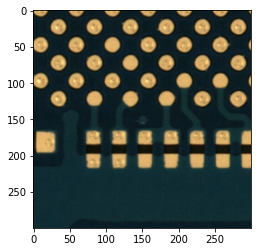

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [37]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [38]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
51.493492
54.38678
3.7418377 3.7418377
-0.94680166 -0.94680166


In [39]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[1. 0.]


In [40]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [48]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))

x1 = Conv2D(300,(3,3),strides=(2,2) ,activation='relu')(input1)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(400,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)

x9= Conv2D(400,(2,2),strides=(1,1) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= AveragePooling2D((7, 7), strides=(1, 1))(x11)


o=keras.layers.Flatten()(x12)








out = keras.layers.Dense(2000,activation="relu")(o)
out=keras.layers.Dropout(0.025,seed=1)(out)
out = keras.layers.Dense(1024,activation="relu")(out)
out = keras.layers.Dense(100,activation="relu")(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 149, 149, 300)     8400      
_________________________________________________________________
batch_normalization_10 (Batc (None, 149, 149, 300)     1200      
_________________________________________________________________
activation_10 (Activation)   (None, 149, 149, 300)     0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 300)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 400)       480400    
_________________________________________________________________
batch_normalization_11 (Batc (None, 37, 37, 400)       1600

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [43]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain,batch_size=20,epochs=50,shuffle='true', verbose=1)

Epoch 1/50
1788/1788 [==============================] - 537s 300ms/step - loss: 0.2039 - acc: 0.9390
Epoch 2/50
1788/1788 [==============================] - 525s 293ms/step - loss: 0.1572 - acc: 0.9491
Epoch 3/50
1788/1788 [==============================] - 528s 295ms/step - loss: 0.1439 - acc: 0.9513
Epoch 4/50
1788/1788 [==============================] - 532s 298ms/step - loss: 0.1353 - acc: 0.9536
Epoch 5/50
1788/1788 [==============================] - 528s 296ms/step - loss: 0.1111 - acc: 0.9564
Epoch 6/50
1788/1788 [==============================] - 528s 295ms/step - loss: 0.0961 - acc: 0.9636
Epoch 7/50
1788/1788 [==============================] - 525s 293ms/step - loss: 0.1016 - acc: 0.9586
Epoch 8/50
1788/1788 [==============================] - 525s 294ms/step - loss: 0.0811 - acc: 0.9704
Epoch 9/50
1788/1788 [==============================] - 524s 293ms/step - loss: 0.0650 - acc: 0.9748
Epoch 10/50
1788/1788 [==============================] - 524s 293ms/step - loss: 0.0620 - a

In [0]:
model.evaluate(xtest,ytest)

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

In [0]:
model.evaluate(xtrain,ytrain)

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))